In [ ]:
# importing all the necessary libraries
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import model_selection as ms
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
import time
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn.model_selection import cross_val_score as cs
from sklearn.model_selection import KFold
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score as ac

In [ ]:
# fetching the dataset
oliv=datasets.fetch_olivetti_faces()
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [ ]:
oliv['data'].shape, oliv['images'].shape

((400, 4096), (400, 64, 64))

In [ ]:
# funtion for plotting important elements
def plotting_fig(s):
    fig=plt.figure(figsize=(7,7))
    for i in range(49):
        ax=fig.add_subplot(7,7,i+1)
        ax.imshow(s[i], cmap=plt.cm.bone)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

In [ ]:
# plotting the predicted values along with true values
def plot_gallery(images,titles,h,w,row=3,col=11):
    plt.figure(figsize=(1.4*col,2*row))
    plt.subplots_adjust(bottom=0,left=0.1,right=.99,top=0.80,hspace=.35)
    for i in range(33):
        plt.subplot(row,col,i+1)
        plt.imshow(images[i].reshape((64,64)),cmap=plt.cm.bone)
        plt.title(titles[i],size=12)
        plt.xticks([])
        plt.yticks([])
def title(y_pred,y_test,i):
    return 'predicted: %s\n true: %s'%(y_pred[i],y_test[i])

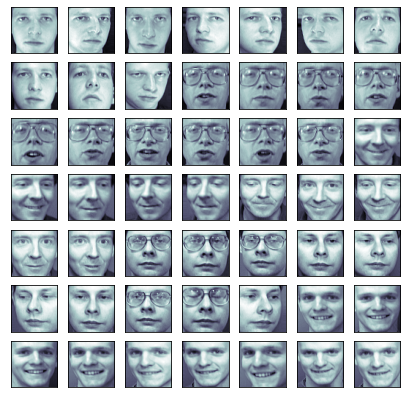

In [ ]:
plotting_fig(oliv.images)    # plotting original dataset

In [ ]:
x=oliv.data
y=oliv.target

In [ ]:
x.shape, y.shape

((400, 4096), (400,))

In [ ]:
# data one hot encoded for tensor flow
onehot_encoder = OneHotEncoder(sparse=False)
one_hot_encoded = y.reshape(400, 1)
y_one_hot_encoded = onehot_encoder.fit_transform(one_hot_encoded)


In [ ]:
y_one_hot_encoded.shape

(400, 40)

In [ ]:
# splitting the data
x_train,x_test,y_train_one_hot,y_test_one_hot= ms.train_test_split(x,y_one_hot_encoded,random_state=1)
x_train,x_test,y_train,y_test= ms.train_test_split(x,y,random_state=1)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape, y_train_one_hot.shape, y_test_one_hot.shape

((300, 4096), (300,), (100, 4096), (100,), (300, 40), (100, 40))

In [ ]:
# running principle component analysis for finding number of components
pca=PCA()
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# calculating number of features to be kept for 95% variance
k=0
total=sum(pca.explained_variance_)
current_sum=0
while current_sum/total<0.95:
    current_sum+=pca.explained_variance_[k]
    k=k+1
k

107

In [ ]:
# running PCA provided with number of components to retain
pca=PCA(n_components=k,whiten= True)
x_transformed=pca.fit_transform(x_train)
x_transformed.shape

(300, 107)

In [ ]:
x_train_pca=x_transformed

In [ ]:
x_test_pca= pca.transform(x_test)
x_test_pca.shape

(100, 107)

In [ ]:
x_approx= pca.inverse_transform(x_transformed)
x_approx= x_approx.reshape((300,64,64))

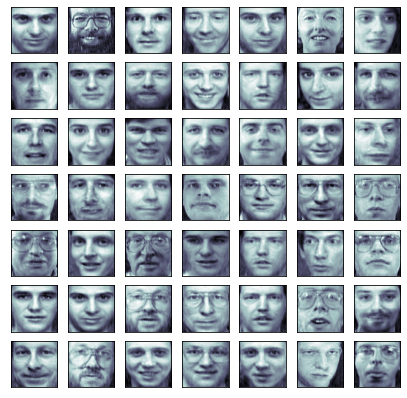

In [ ]:
plotting_fig(x_approx)      # images after keeping only 95% of varience  

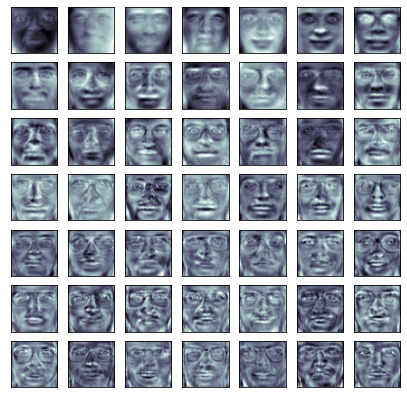

In [ ]:
eig_v= pca.components_.reshape((k,64,64))   # regenerated images from principle components only
plotting_fig(eig_v)

# Using various Regression and Classification techniques to solve the desired problem

## 1. NEURAL NETWORK (Tenserflow) 

### Without using PCA

In [ ]:
pip install --upgrade pip

In [ ]:
pip install tensorflow==2.0.0-alpha0

In [ ]:
pip install keras

In [ ]:
pip install numpy==1.16.2

In [ ]:
import tensorflow as tf

In [ ]:
session=tf.compat.v1.Session()

In [ ]:
n_ip=4096
n_hidden1= 1000
n_hidden2= 1000
n_classes= 40

In [ ]:
wts={ "h1": tf.Variable(tf.random.normal([n_ip,n_hidden1])), "h2": tf.Variable(tf.random.normal([n_hidden1,n_hidden2])), 
    "out": tf.Variable(tf.random.normal([n_hidden2,n_classes]))}

In [ ]:
bias={ "h1": tf.Variable(tf.random.normal([n_hidden1])), "h2": tf.Variable(tf.random.normal([n_hidden2])), 
    "out": tf.Variable(tf.random.normal([n_classes]))}

In [ ]:
# forward propogation of the data
def frwd_p(x,wts,bias):
    in_layer1= tf.add(tf.matmul(x,wts["h1"]),bias["h1"])
    o_layer1= tf.nn.relu(in_layer1)
    in_layer2= tf.add(tf.matmul(o_layer1,wts["h2"]),bias["h2"])
    o_layer2= tf.nn.relu(in_layer2)
    out= tf.add(tf.matmul(o_layer2,wts["out"]),bias["out"])    
    return out   

In [ ]:
import tensorflow.compat.v1 as tf

In [ ]:
tf.disable_v2_behavior()

In [ ]:
sess.run(tf.global_variables_initializer())
x1= tf.placeholder('float',[None,n_ip])
y1= tf.placeholder(tf.int32,[None,n_classes])



In [ ]:
pred= frwd_p(x1,wts,bias)
predictions= tf.argmax(pred,1)
true_labels= tf.argmax(y1,1)
correct_pred= tf.equal(predictions,true_labels)

In [ ]:
start=time.time()
predictions_eval,labels,correct_pred1= sess.run([predictions,true_labels,correct_pred],
                                               feed_dict={x1:x_test, y1:y_test_one_hot})
end=time.time()

In [ ]:
print('Total correct predictions ',correct_pred1.sum())

Total correct predictions  1


In [ ]:
print('Accuracy ',correct_pred1.sum()/len(y_test))
print('Time taken is ',(end-start))

Accuracy  0.01
Time taken is  0.044824838638305664


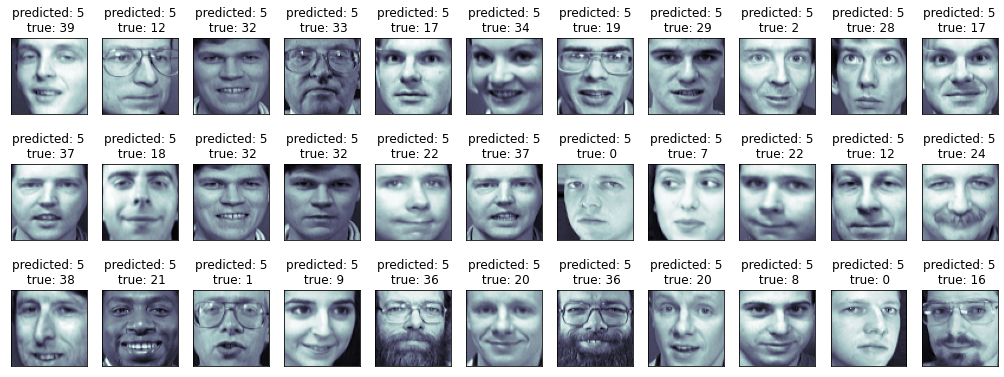

In [ ]:
# showing comparison of actual values with predicted ones (can only show 33 comparison)
prediction1 = [title(predictions_eval,y_test,i) for i in range(predictions_eval.shape[0])]
plot_gallery(x_test,prediction1,64,64)

### With PCA

In [ ]:
n_ip=k
n_hidden1= 100
n_hidden2= 70
n_classes= 40

In [ ]:
wts={ "h1": tf.Variable(tf.random_normal([n_ip,n_hidden1])), "h2": tf.Variable(tf.random_normal([n_hidden1,n_hidden2])), 
    "out": tf.Variable(tf.random_normal([n_hidden2,n_classes]))}

In [ ]:
bias={ "h1": tf.Variable(tf.random_normal([n_hidden1])), "h2": tf.Variable(tf.random_normal([n_hidden2])), 
    "out": tf.Variable(tf.random_normal([n_classes]))}

In [ ]:
#forward propogation
def frwd_p(x,wts,bias):
    in_layer1= tf.add(tf.matmul(x,wts["h1"]),bias["h1"])
    o_layer1= tf.nn.relu(in_layer1)
    in_layer2= tf.add(tf.matmul(o_layer1,wts["h2"]),bias["h2"])
    o_layer2= tf.nn.relu(in_layer2)
    out= tf.add(tf.matmul(o_layer2,wts["out"]),bias["out"])
    return out 

In [ ]:
sess.run(tf.global_variables_initializer())
x1= tf.placeholder('float',[None,n_ip])
y1= tf.placeholder(tf.int32,[None,n_classes])

In [ ]:
pred= frwd_p(x1,wts,bias)
predictions= tf.argmax(pred,1)
true_labels= tf.argmax(y1,1)
correct_pred= tf.equal(predictions,true_labels)

In [ ]:
start=time.time()
predictions_eval,labels,correct_pred1= sess.run([predictions,true_labels,correct_pred],
                                               feed_dict={x1:x_test_pca, y1:y_test_one_hot})
end=time.time()

In [ ]:
print('Total correct predicted values',correct_pred1.sum())

Total correct predicted values 3


In [ ]:
print('Accuracy ',correct_pred1.sum()/len(y_test))
print('Time taken is',(end-start))

Accuracy  0.03
Time taken is 0.05209851264953613


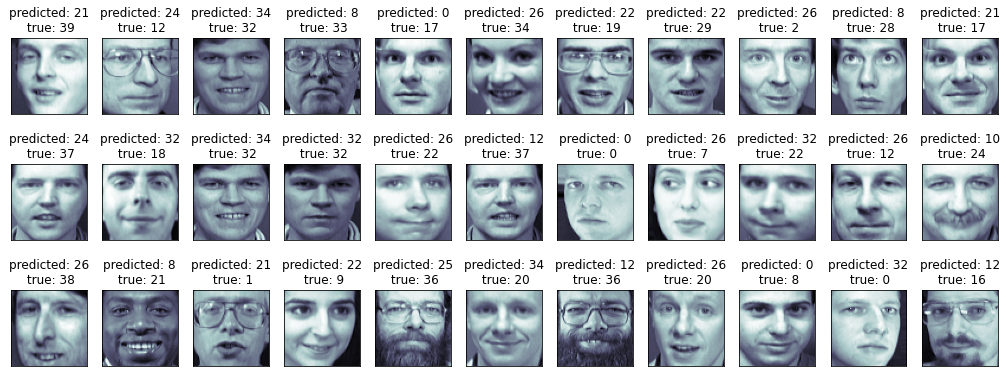

In [ ]:
# showing comparison of actual values with predicted ones
prediction1 = [title(predictions_eval,y_test,i) for i in range(predictions_eval.shape[0])]
plot_gallery(x_test,prediction1,64,64)

## 2. RANDOM FOREST

### Without using PCA

In [ ]:
rf= ensemble.RandomForestClassifier()
start=time.time()
rf.fit(x_train, y_train)
end=time.time()
y_pred= rf.predict(x_test)
print('Accuracy score is ',rf.score(x_test,y_test))
print('Time taken is ',(end-start))


Accuracy score is  0.92
Time taken is  2.4483938217163086


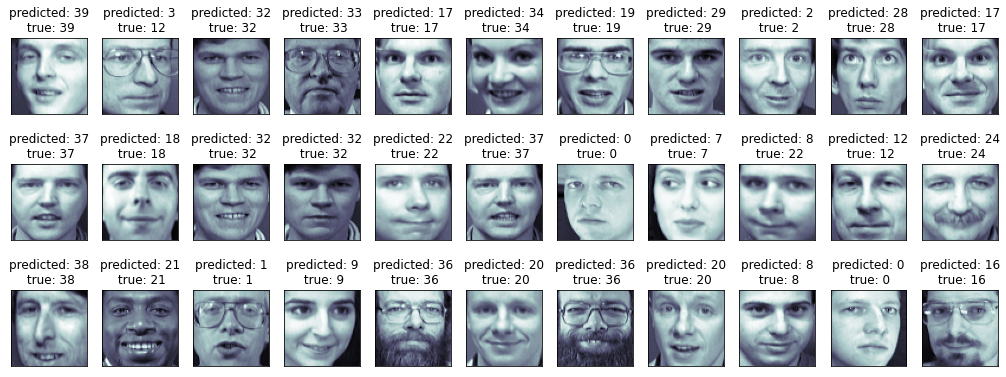

In [ ]:
# showing comparison of actual values with predicted ones
prediction2 = [title(y_pred,y_test,i) for i in range(y_pred.shape[0])]
plot_gallery(x_test,prediction2,64,64)

### With PCA

In [ ]:
start=time.time()
rf.fit(x_train_pca, y_train)
end=time.time()
y_pred= rf.predict(x_test_pca)
print('Accuracy score is ',rf.score(x_test_pca,y_test))
print('Time taken is ',(end-start))

Accuracy score is  0.88
Time taken is  0.5110249519348145


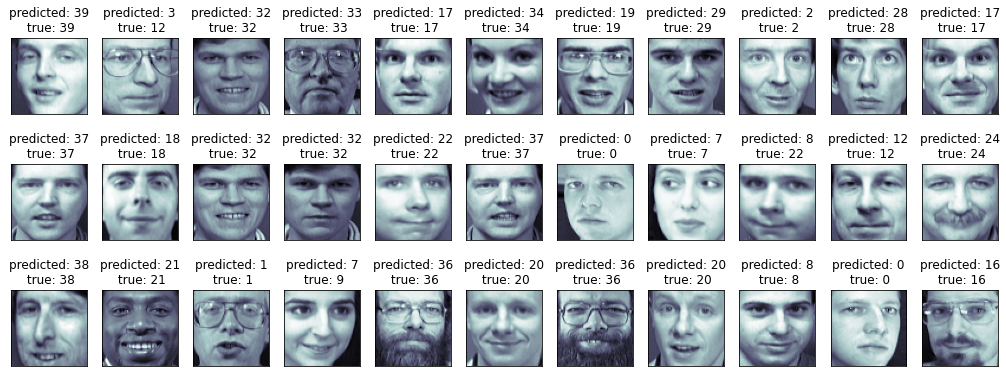

In [ ]:
# showing comparison of actual values with predicted ones
prediction3 = [title(y_pred,y_test,i) for i in range(y_pred.shape[0])]
plot_gallery(x_test,prediction3,64,64)

## 3. SVM

### Without using PCA

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
clf=svm.SVC()
grid={"C":[1e2, 1e3, 5e3, 1e4, 5e4, 1e5], "gamma": [1e-3, 5e-4, 1e-4, 5e-3]}
abc=GridSearchCV(clf,grid)


In [ ]:
start=time.time()
abc.fit(x_train, y_train)
end=time.time()
pred=abc.predict(x_test)
abc.best_estimator_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print('Accuracy score is ',abc.score(x_test,y_test))
print('Time taken is',(end-start))

Accuracy score is  0.96
Time taken is 107.68973898887634


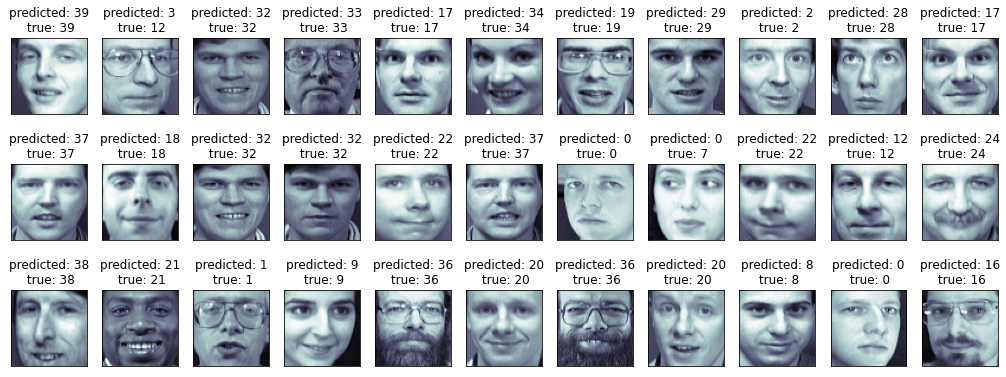

In [ ]:
#showing comparison of actual values with predicted ones
prediction = [title(pred,y_test,i) for i in range(pred.shape[0])]
plot_gallery(x_test,prediction,64,64)

### With PCA

In [ ]:
start=time.time()
abc.fit(x_train_pca, y_train)
end=time.time()
pred=abc.predict(x_test_pca)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [ ]:
print('Accuracy score is ',abc.score(x_test_pca,y_test))
print('Time taken is',(end-start))

Accuracy score is  0.94
Time taken is 4.77839732170105


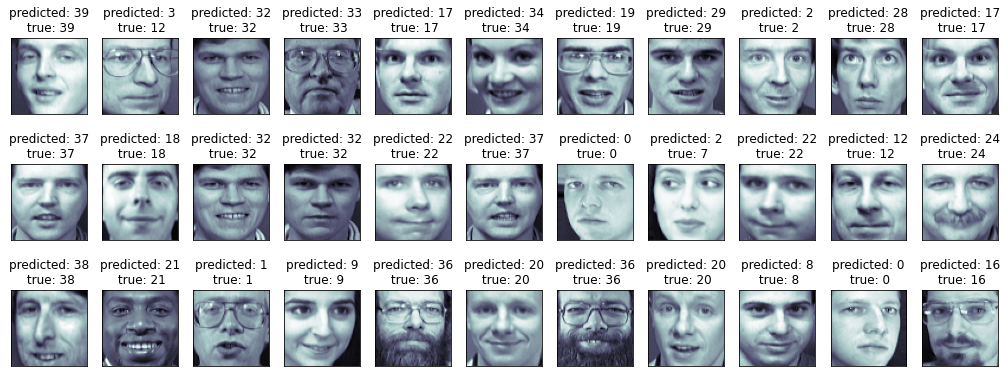

In [ ]:
# showing comparison of actual values with predicted ones
prediction = [title(pred,y_test,i) for i in range(pred.shape[0])]
plot_gallery(x_test,prediction,64,64)

## 4. LINEAR REGRESSION

### Without PCA

In [ ]:
from sklearn.linear_model import LinearRegression as lr

In [ ]:
algo=lr()
start=time.time()
algo.fit(x_train,y_train)
end=time.time()
y_p=algo.predict(x_test)

In [ ]:
y_p_i=[int(i) for i in y_p]
y_p_i=np.array(y_p_i)

In [ ]:
print('Accuracy score is ',algo.score(x_test,y_test))
print('Time taken is',(end-start))

Accuracy score is  0.6129983816263431
Time taken is 0.2034609317779541


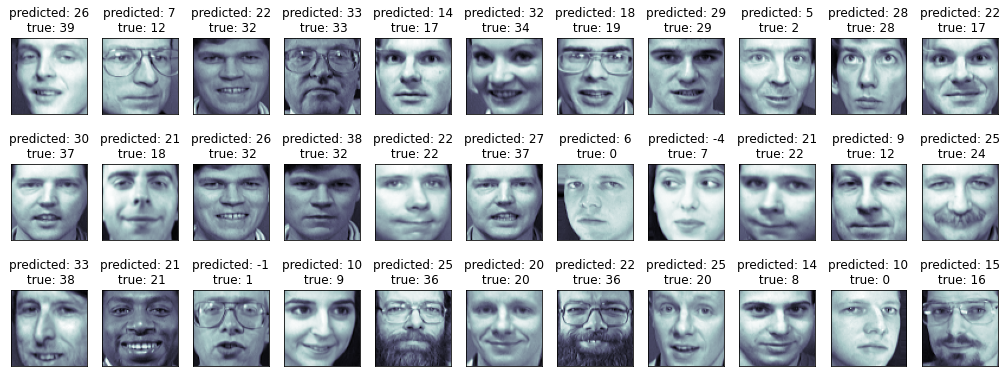

In [ ]:
# showing comparison of actual values with predicted ones
prediction4 = [title(y_p_i,y_test,i) for i in range(y_p_i.shape[0])]
plot_gallery(x_test,prediction4,64,64)

### With PCA

In [ ]:
start=time.time()
algo.fit(x_train_pca,y_train)
end=time.time()
y_p=algo.predict(x_test_pca)

In [ ]:
print('Accuracy score is',algo.score(x_test_pca,y_test))
print('Time taken is',(end-start))

Accuracy score is 0.52564330854458
Time taken is 0.0041315555572509766


In [ ]:
y_p_i=[int(i) for i in y_p]
y_p_i=np.array(y_p_i)

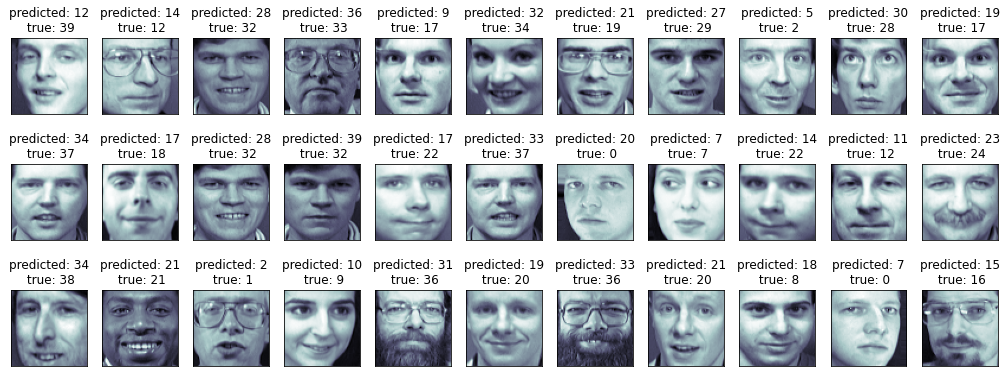

In [ ]:
# showing comparison of actual values with predicted ones
prediction5 = [title(y_p_i,y_test,i) for i in range(y_p_i.shape[0])]
plot_gallery(x_test,prediction5,64,64)

## 5. KNN (self implemented)

### Without using PCA

In [ ]:
for i in range(1,10,2):
    clf=knn(n_neighbors =i)
    score= cs(clf,x_train,y_train,cv=KFold(5,True,0))
    print(i,score.mean())

1 0.8799999999999999
3 0.7833333333333334
5 0.6966666666666667
7 0.6566666666666666
9 0.5966666666666667


In [ ]:
# predicting class of current row of features
def predict_one(x1,x_train,y_train,k):
    distances=[]
    y=[]
    for i in range(len(x_train)):
        distance= ((x_train[i,:]-x1)**2).sum()
        distances.append([distance,i])
    distances=sorted(distances)
    for j in range(k):
        index_= distances[j][1]
        y.append(y_train[index_])
    return Counter(y).most_common(1)[0][0]

In [ ]:
# predict function
def predict(x_test,x_train,y_train,k):
    y_pred=[]
    for i in x_test:
        y_pred.append(predict_one(i,x_train,y_train,k))
    return y_pred

In [ ]:
k=1
start=time.time()
y_pred1=predict(x_test,x_train,y_train,k)
end=time.time()

In [ ]:
print('Accuracy score is',ac(y_test,y_pred1))
print('Time taken is',(end-start))

Accuracy score is 0.89
Time taken is 0.30022454261779785


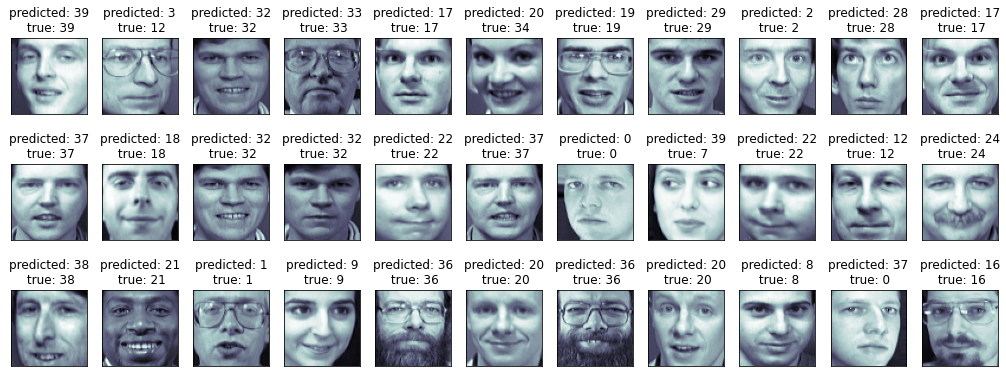

In [ ]:
# showing comparison of actual values with predicted ones
y_pred1=np.array(y_pred1)
prediction6 = [title(y_pred1,y_test,i) for i in range(y_pred1.shape[0])]
plot_gallery(x_test,prediction6,64,64)

### With PCA

In [ ]:
start=time.time()
y_pred2=predict(x_test_pca,x_train_pca,y_train,k)
end=time.time()

In [ ]:
print('Accuracy score is',ac(y_test,y_pred2))
print('Time taken is',(end-start))

Accuracy score is 0.88
Time taken is 0.20963811874389648


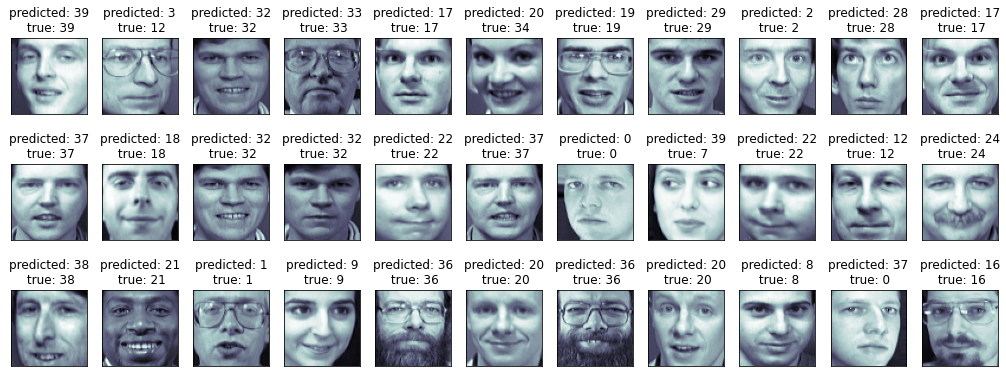

In [ ]:
# showing comparison of actual values with predicted ones
y_pred1=np.array(y_pred1)
prediction7 = [title(y_pred1,y_test,i) for i in range(y_pred1.shape[0])]
plot_gallery(x_test,prediction7,64,64)

## 6. LOGISTIC REGRESSION

 ### Wihout using PCA

In [ ]:
lr=LogisticRegression()
start=time.time()
lr.fit(x_train,y_train)
end=time.time()
predd=lr.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print('Accuracy score is',ac(y_test,predd))
print('Time taken is',(end-start))

Accuracy score is 0.97
Time taken is 5.741121053695679


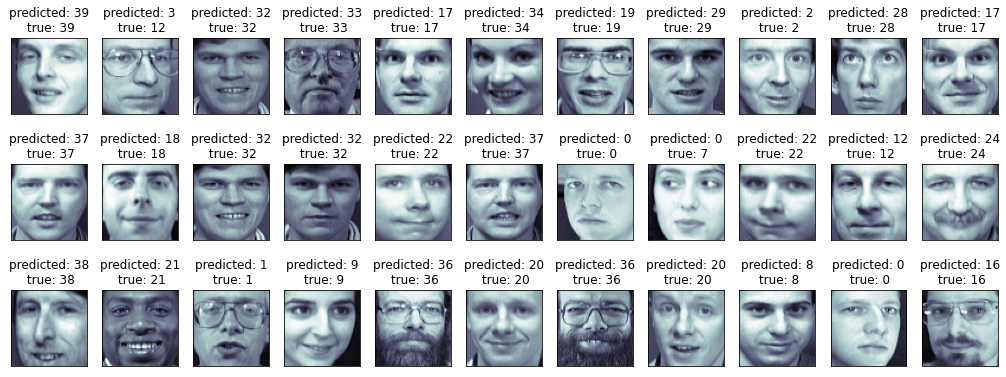

In [ ]:
# showing comparison of actual values with predicted ones
prediction8 = [title(predd,y_test,i) for i in range(predd.shape[0])]
plot_gallery(x_test,prediction8,64,64)

### With PCA

In [ ]:
start=time.time()
lr.fit(x_train_pca,y_train)
end=time.time()
predd2=lr.predict(x_test_pca)

In [ ]:
print('Accuracy score is',ac(y_test,predd2))
print('Time taken is ',(end-start))

Accuracy score is 0.93
Time taken is  0.15232610702514648


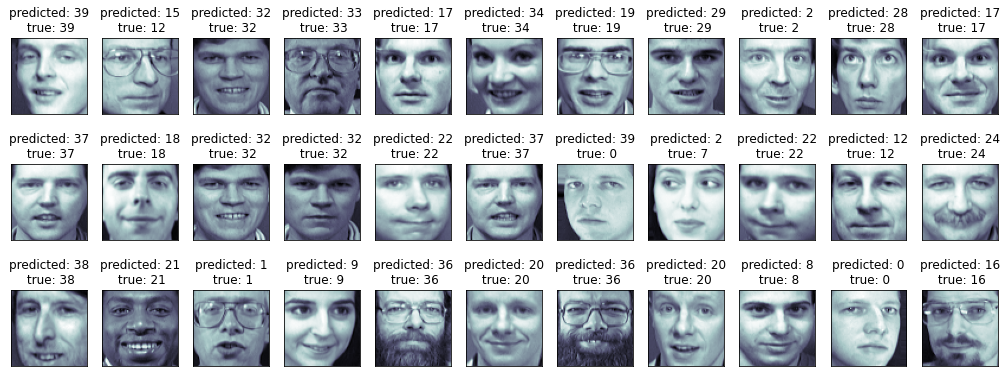

In [ ]:
# showing comparison of actual values with predicted ones
prediction8 = [title(predd2,y_test,i) for i in range(predd2.shape[0])]
plot_gallery(x_test,prediction8,64,64)

#### ___________ start refers to the time at the start of fitting process and end represents the ending time_____

# _THE END_